In [1]:
!pip install pandas-ta

In [2]:
import yfinance as yf

# Exemple : Récupérer les données historiques d'une action ou d'un indice
data = yf.download('NVDA', start="2020-11-20", end="2025-11-20")
print(data.head(20))

/tmp/ipython-input-3845318490.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('NVDA', start="2020-11-20", end="2025-11-20")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2020-11-20  13.047195  13.452685  13.024515  13.412311  341088000
2020-11-23  13.099280  13.341028  12.975166  13.130434  361356000
2020-11-24  12.917598  13.121214  12.845073  13.101775  346500000
2020-11-25  13.193737  13.228379  12.979653  12.992114  259916000
2020-11-27  13.220155  13.365952  13.129686  13.333553  167276000
2020-11-30  13.359969  13.370936  12.932050  13.223893  286952000
2020-12-01  13.348507  13.486827  13.187257  13.450440  296948000
2020-12-02  13.502530  13.631130  13.193241  13.309131  283360000
2020-12-03  13.358430  13.621689  13.291618  13.549393  199520000
2020-12-04  13.520227  13.521973  13.351202  13.410784  202244000
2020-12-07  13.568593  13.692744  13.462143  13.563109  223244000
2020-12-08  13.312563  13.560615  13.244255  13.546904  271920000
2020-12-09

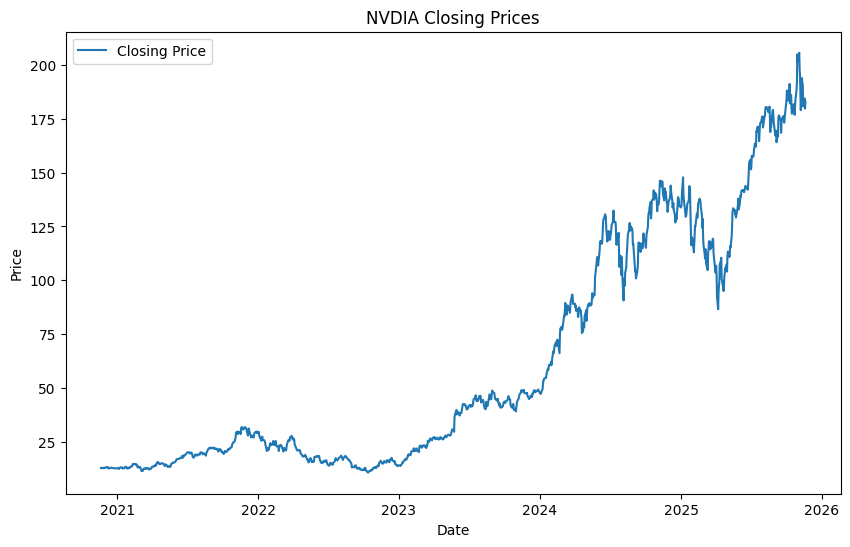

In [3]:
# Visualiser les prix de clôture
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['Low'], label='Closing Price')
plt.title('NVDIA Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [4]:
# Sauvegarder les données dans un fichier CSV
data.to_csv('NVDIA_historical_data.csv', index=True)  # 'index=True' garde la colonne Date

print("Les dnes sauvegardées dans 'NVDIA_historical_data.csv'.")

Les dnes sauvegardées dans 'NVDIA_historical_data.csv'.


In [5]:
from google.colab import files

# Télécharger le fichier CSV
files.download('NVDIA_historical_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Charger les données
data = pd.read_csv('NVDIA_historical_data.csv')

# Vérifiez les colonnes

print("Colonnes disponibles :", data.columns)

Colonnes disponibles : Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [7]:
data.describe()

,Price,Close,High,Low,Open,Volume
count,1257,1256,1256,1256,1256,1256
unique,1257,1247,1256,1256,1256,1256
top,2025-11-19,140.07168579101562,187.8495347223247,182.8198161698128,184.7796984316032,247246400
freq,1,2,1,1,1,1


In [8]:
data.isna().sum()

,0
Price,0
Close,1
High,1
Low,1
Open,1
Volume,1


In [9]:
data.shape

(1257, 6)

In [10]:
data.dropna(inplace=True)

In [11]:
data.drop(index=0,inplace=True)

In [12]:
# Vérifie le type de la colonne Close
print(data['Close'].dtype)  # Devrait être float64

# Si nécessaire, convertis-la en numérique
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
print(data['Close'].dtype)#

object
float64


In [13]:
# Créer une colonne 'Date' si elle est absente
if 'Date' not in data.columns:
    print("Aucune colonne 'Date' trouvée, génération d'un index temporel artificiel...")
    data['Date'] = pd.date_range(start="2022-10-20", periods=len(data), freq='D')

# Convertir 'Date' en format datetime et définir comme index
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# Vérifiez les valeurs non numériques dans la colonne 'Close'
print("Valeurs uniques dans 'Close' avant traitement :", data['Close'].unique())

# Convertir 'Close' en numérique
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Supprimer les lignes avec des valeurs NaN
data = data.dropna(subset=['Close'])

# Ajout d'indicateurs techniques (moyennes mobiles)
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

Aucune colonne 'Date' trouvée, génération d'un index temporel artificiel...
Valeurs uniques dans 'Close' avant traitement : [ 13.04719543  13.09928036  12.91759777 ... 186.58961487 181.34989929
 186.50961304]


In [14]:
data.head(30)

,Price,Close,High,Low,Open,Volume,SMA_10,SMA_30
Date,,,,,,,,
2022-10-20,2020-11-20,13.047195,13.452684764910122,13.024515078130138,13.412310574058976,341088000,NaN,NaN
2022-10-21,2020-11-23,13.099280,13.341028219522052,12.975165900762292,13.130433515692037,361356000,NaN,NaN
2022-10-22,2020-11-24,12.917598,13.121214239336203,12.845073111917616,13.101774885108085,346500000,NaN,NaN
2022-10-23,2020-11-25,13.193737,13.228379329098729,12.979653173979193,12.992114247965226,259916000,NaN,NaN
2022-10-24,2020-11-27,13.220155,13.365952276272498,13.129686242574325,13.333552723080512,167276000,NaN,NaN
2022-10-25,2020-11-30,13.359969,13.370935681900644,12.932049600173414,13.223892739343428,286952000,NaN,NaN
2022-10-26,2020-12-01,13.348507,13.486827040045208,13.1872573732238,13.450440170378451,296948000,NaN,NaN
2022-10-27,2020-12-02,13.502530,13.631130077502323,13.19324118615636,13.3091310010847,283360000,NaN,NaN
2022-10-28,2020-12-03,13.358430,13.621689441798047,13.291618377835375,13.549392544776138,199520000,NaN,NaN


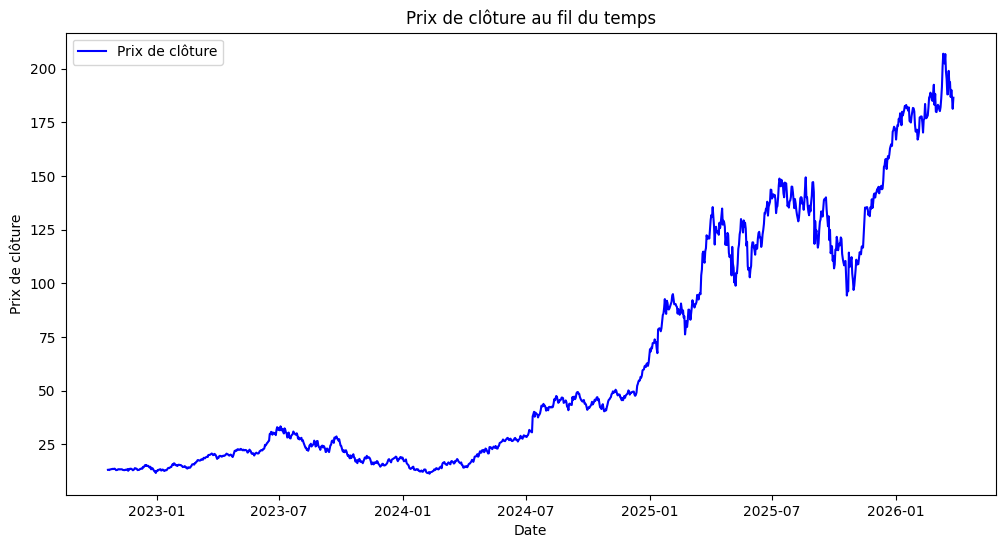

In [15]:
# Supprimer les colonnes inutiles pour le scalage
data = data[['Close']]  # Conserver uniquement la colonne 'Close'

# Visualisation des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Prix de clôture', color='blue')
plt.title('Prix de clôture au fil du temps')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()

In [16]:
# Mise à l'échelle des données
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Préparation des séquences pour LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Division des données en ensembles d'entraînement et de test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape pour LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Construction et entraînement du modèle LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Éviter le surapprentissage
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

print("Entraînement du modèle LSTM...")
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Prédictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

Entraînement du modèle LSTM...
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0035 - val_loss: 0.0069
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 3.9496e-04 - val_loss: 0.0028
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 2.4992e-04 - val_loss: 0.0021
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.5831e-04 - val_loss: 0.0067
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 2.6818e-04 - val_loss: 0.0050
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 2.0673e-04 - val_loss: 0.0043
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 2.1156e-04 - val_loss: 0.0053
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.3032e-04 - val_loss: 0.0133
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 2.3675e-04 - val_loss: 0.0053
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 1.8348e-04 - val_loss: 0.0090
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.7050e-04 - val_loss: 0.0062
Epoch 12/100
24/24 ━━━━━

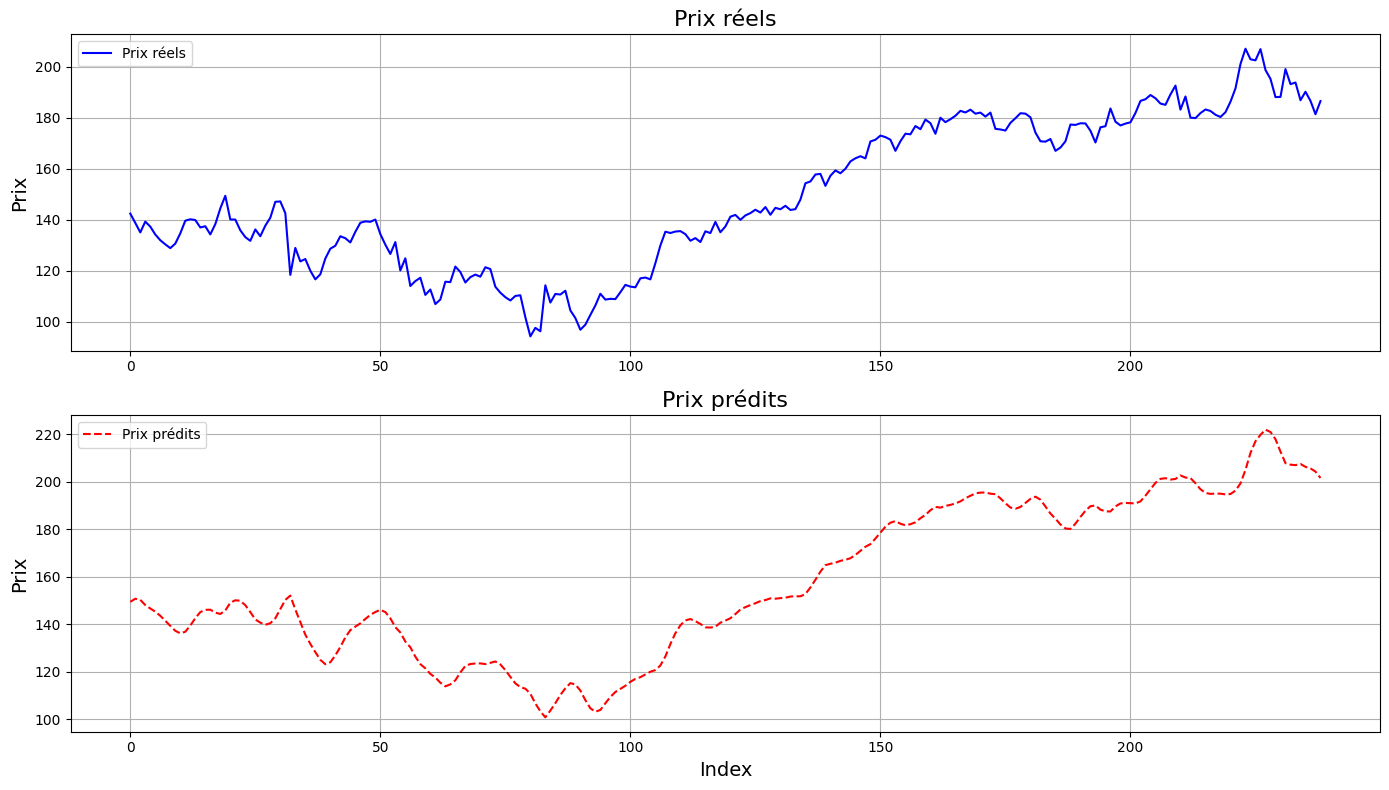

In [17]:
# Visualisation des résultats avec des courbes séparées
plt.figure(figsize=(14, 8))

# Première courbe : Prix réels
plt.subplot(2, 1, 1)
plt.plot(y_test, label='Prix réels', color='blue', linestyle='-')
plt.title('Prix réels', fontsize=16)
plt.ylabel('Prix', fontsize=14)
plt.grid()
plt.legend()

# Deuxième courbe : Prix prédits
plt.subplot(2, 1, 2)
plt.plot(y_pred, label='Prix prédits', color='red', linestyle='--')
plt.title('Prix prédits', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Prix', fontsize=14)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

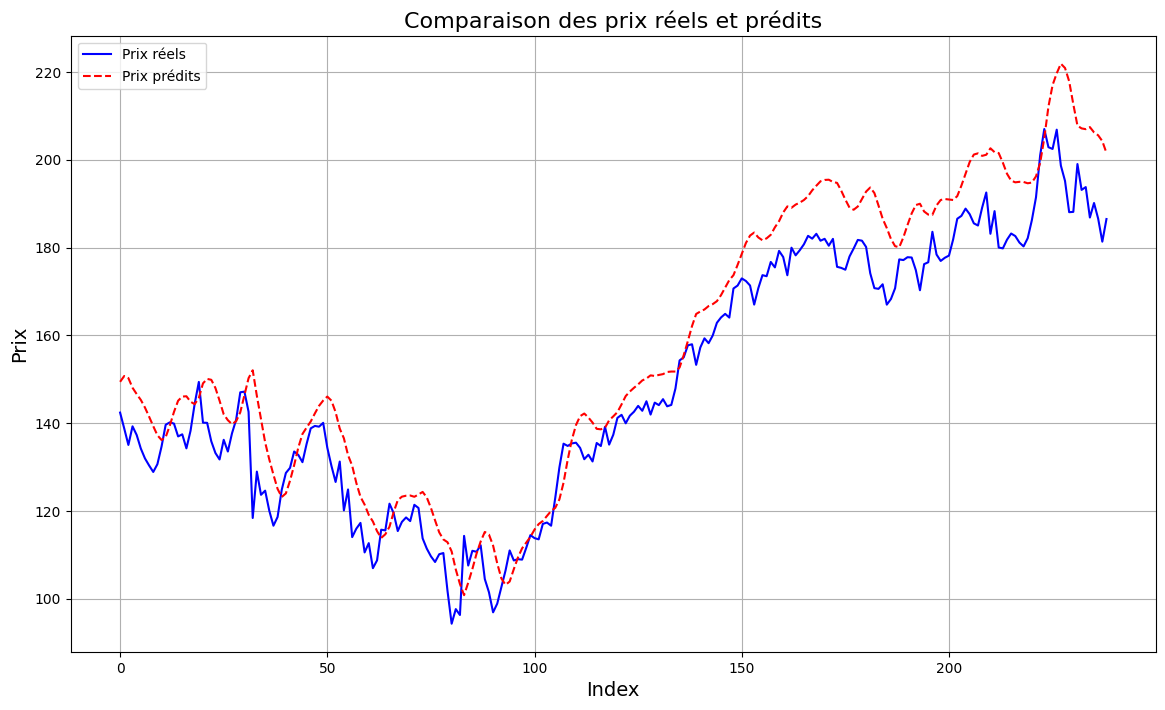

In [18]:
plt.figure(figsize=(14, 8))

# Tracé des prix réels
plt.plot(y_test, label='Prix réels', color='blue', linestyle='-')
# Tracé des prix prédits
plt.plot(y_pred, label='Prix prédits', color='red', linestyle='--')

plt.title('Comparaison des prix réels et prédits', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Prix', fontsize=14)
plt.grid()
plt.legend()
plt.show()

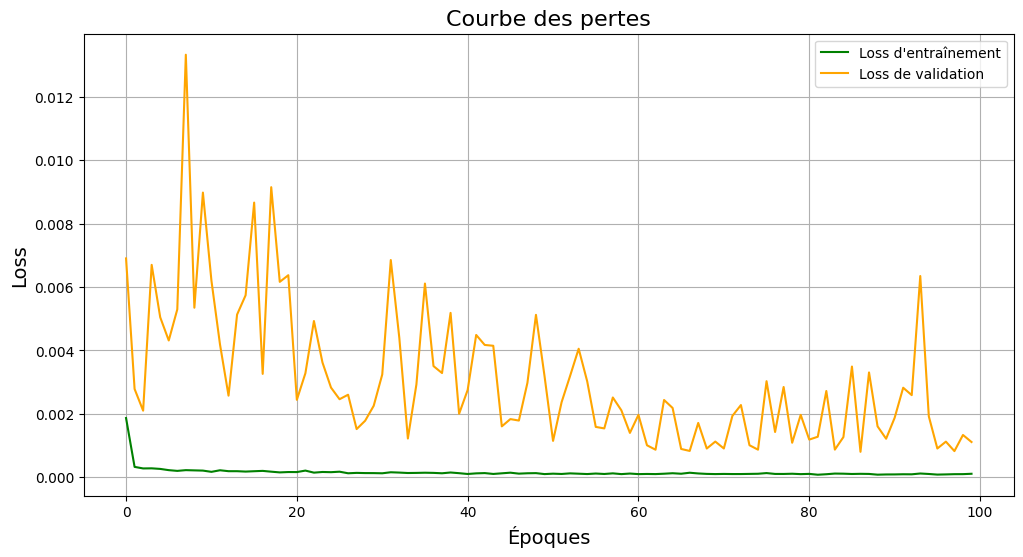

In [19]:
# Courbe des pertes
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss d\'entraînement', color='green')
plt.plot(history.history['val_loss'], label='Loss de validation', color='orange')
plt.title('Courbe des pertes', fontsize=16)
plt.xlabel('Époques', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [20]:
# Calcul des moyennes mobiles
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()

# Vérifie les nouvelles colonnes
print(data[['Close', 'SMA_10', 'SMA_30']].head(15))

                Close     SMA_10  SMA_30
Date                                    
2022-10-20  13.047195        NaN     NaN
2022-10-21  13.099280        NaN     NaN
2022-10-22  12.917598        NaN     NaN
2022-10-23  13.193737        NaN     NaN
2022-10-24  13.220155        NaN     NaN
2022-10-25  13.359969        NaN     NaN
2022-10-26  13.348507        NaN     NaN
2022-10-27  13.502530        NaN     NaN
2022-10-28  13.358430        NaN     NaN
2022-10-29  13.520227  13.256763     NaN
2022-10-30  13.568593  13.308903     NaN
2022-10-31  13.312563  13.330231     NaN
2022-11-01  12.894488  13.327920     NaN
2022-11-02  12.935872  13.302133     NaN
2022-11-03  12.976755  13.277794     NaN


In [21]:
# Supprimer les lignes avec NaN dans les moyennes mobiles
data = data.dropna(subset=['SMA_10', 'SMA_30'])

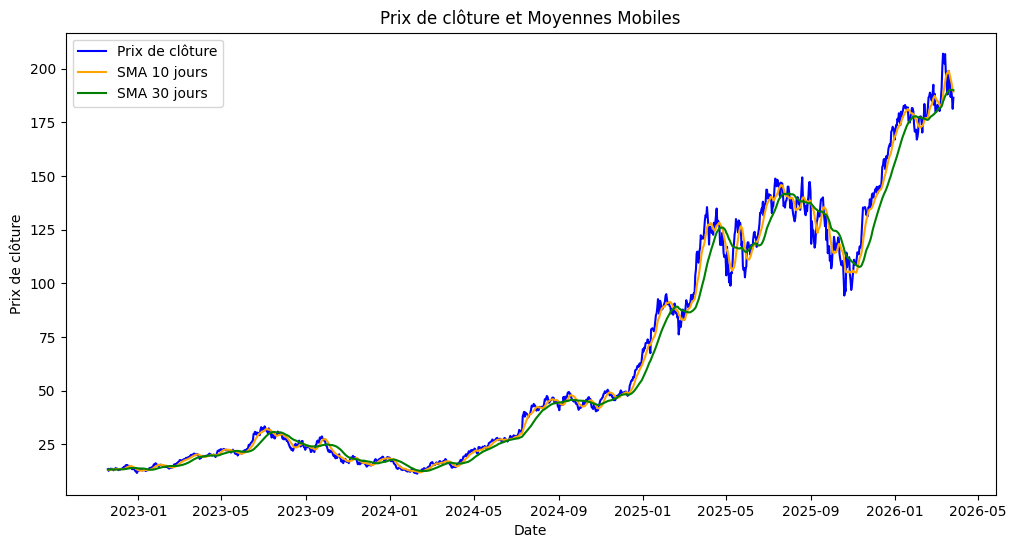

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Prix de clôture', color='blue')
plt.plot(data['SMA_10'], label='SMA 10 jours', color='orange')
plt.plot(data['SMA_30'], label='SMA 30 jours', color='green')
plt.title('Prix de clôture et Moyennes Mobiles')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()